In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set_style('white', {'font.sans-serif':['simhei','Arial']})
pd.set_option("display.max_rows", 1000)

In [2]:
iris = load_iris()
X = iris['data']
Y = iris['target']

display(X[:5])
display(pd.Series(Y).value_counts())

Y = Y.reshape(-1, 1) # Y的形状转换为[150, 1]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

0    50
1    50
2    50
dtype: int64

In [3]:
data = pd.DataFrame(np.concatenate((X, Y), axis=1),
                    columns=["萼片长", "萼片宽", "花瓣长", "花瓣宽", "种类"])
kind_dict = {
    0:"山鸢尾",
    1:"杂色鸢尾",
    2:"维吉尼亚鸢尾"
}
data["种类"] = data["种类"].map(kind_dict)
data.head()

,萼片长,萼片宽,花瓣长,花瓣宽,种类
0,5.1,3.5,1.4,0.2,山鸢尾
1,4.9,3.0,1.4,0.2,山鸢尾
2,4.7,3.2,1.3,0.2,山鸢尾
3,4.6,3.1,1.5,0.2,山鸢尾
4,5.0,3.6,1.4,0.2,山鸢尾


array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

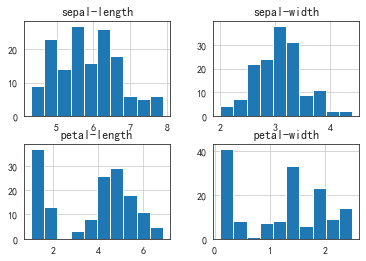

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']  
dataset = pd.read_csv(url, names=names)
dataset.hist() #数据直方图histograms

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

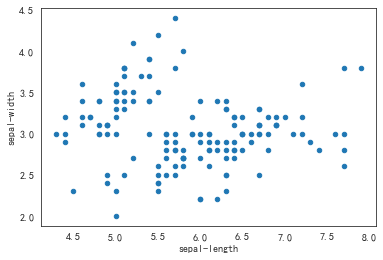

In [7]:
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter') #散点图，x轴表示sepal-length花萼长度，y轴表示sepal-width花萼宽度

<AxesSubplot:ylabel='Density'>

C:\Users\zhouz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhouz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


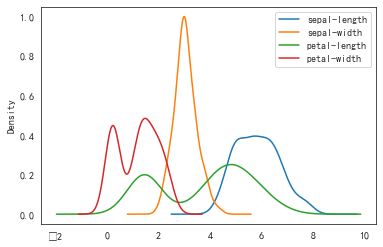

In [8]:
dataset.plot(kind='kde') #KDE图，KDE图也被称作密度图(Kernel Density Estimate,核密度估计)

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

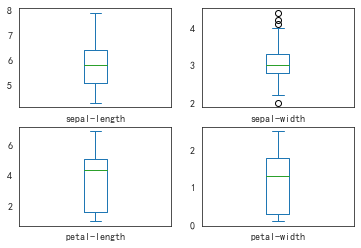

In [9]:
#kind='box'绘制箱图,包含子图且子图的行列布局layout为2*2，子图共用x轴、y轴刻度，标签为False
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

### K-Means聚类分析

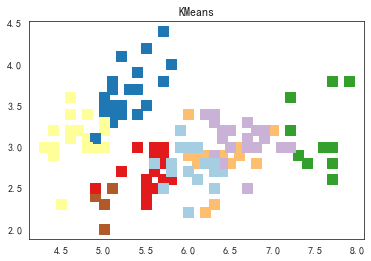

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
clf = KMeans()
clf.fit(iris.data,iris.target)
predicted = clf.predict(iris.data)

pos = pd.DataFrame(dataset)    
L1 = pos['sepal-length'].values   
L2 = pos['sepal-width'].values    

plt.scatter(L1, L2, c=predicted, marker='s',s=100,cmap=plt.cm.Paired)    
plt.title("KMeans")    
plt.show()  

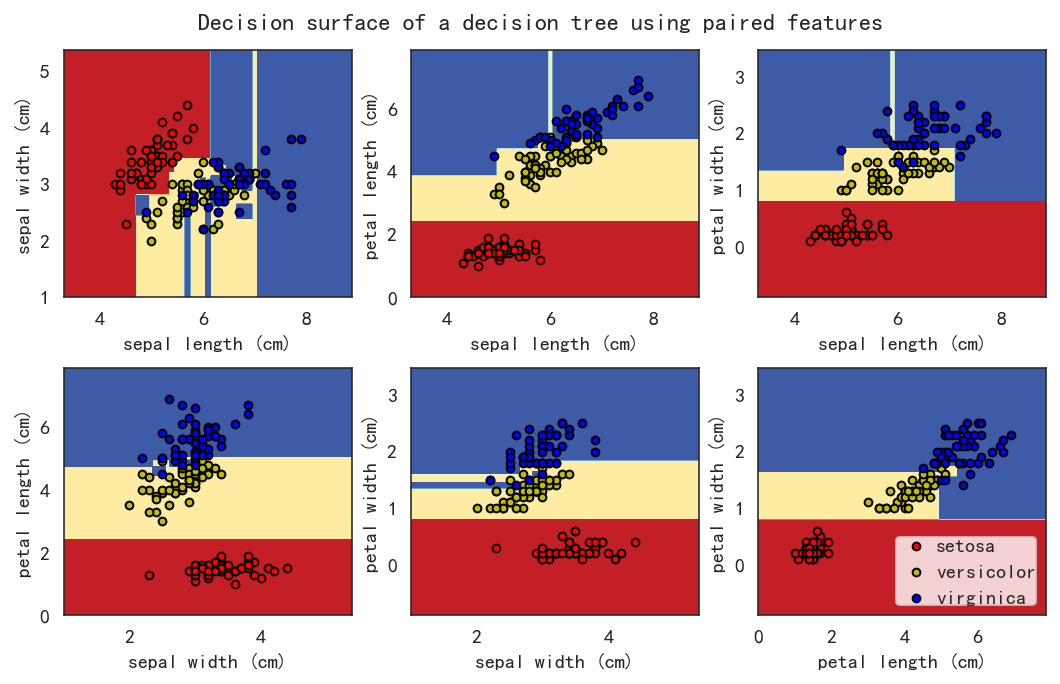

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize=(8,5), dpi=144)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()